<a href="https://colab.research.google.com/github/SaahilArora/DataScienceTutorial/blob/master/hand_written_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import keras

Using TensorFlow backend.


In [0]:
import tensorflow as tf

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


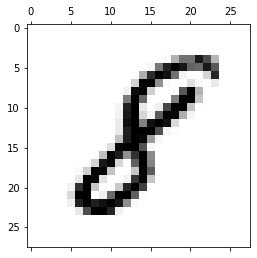

In [13]:
plt.matshow(x_train[7777], cmap='Greys')

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(120, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [28]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 35s 589us/step - loss: 0.2050 - accuracy: 0.9380
Epoch 2/5
60000/60000 [==============================] - 35s 591us/step - loss: 0.0831 - accuracy: 0.9739
Epoch 3/5
60000/60000 [==============================] - 36s 594us/step - loss: 0.0602 - accuracy: 0.9809
Epoch 4/5
60000/60000 [==============================] - 36s 598us/step - loss: 0.0467 - accuracy: 0.9850
Epoch 5/5
60000/60000 [==============================] - 36s 594us/step - loss: 0.0370 - accuracy: 0.9879


In [29]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 178us/step


[0.05778694134237303, 0.982699990272522]

2


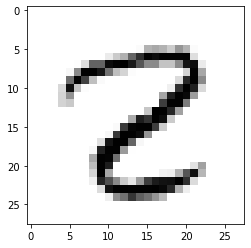

In [41]:
image_index = 2610
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())